In [0]:
import numpy as np
from numpy import linalg as LA
import cv2
from skimage import io
from google.colab.patches import cv2_imshow
from math import *

### Task 1

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


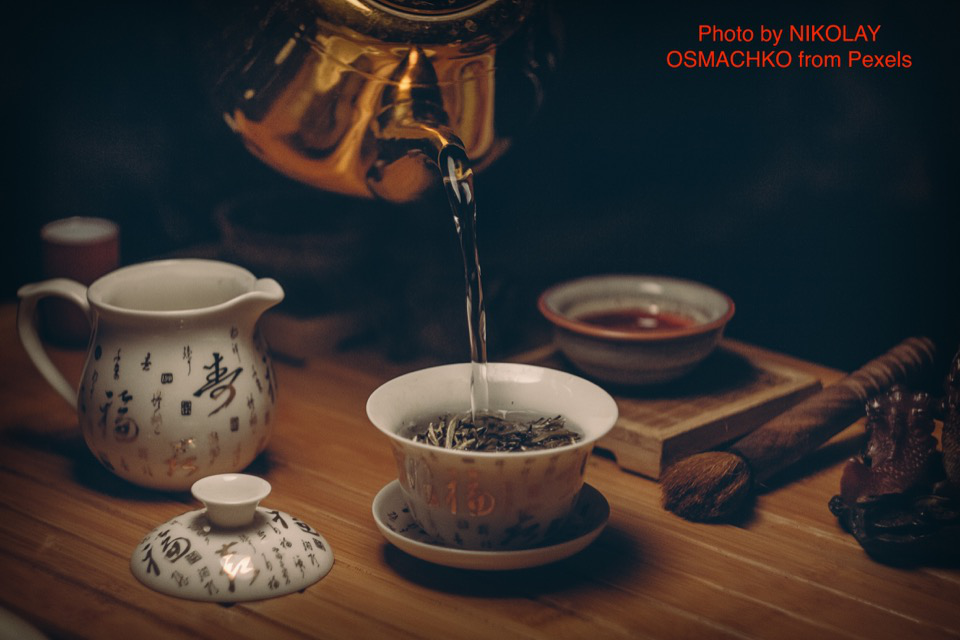

In [46]:
def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)
cv2_imshow(imgc)

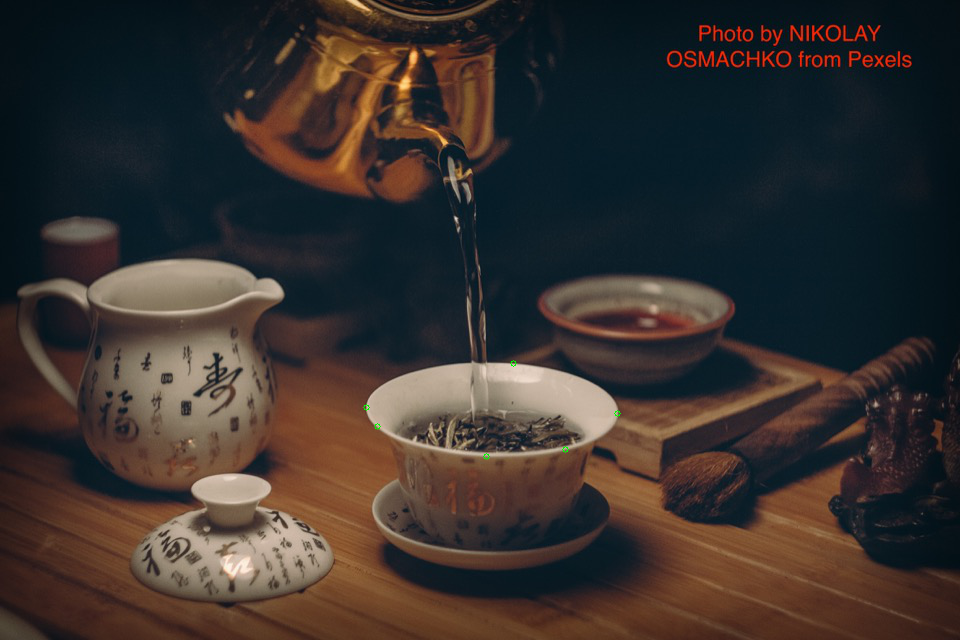

In [47]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [617, 413] ], np.double)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
#draw points
cv2_imshow(img)

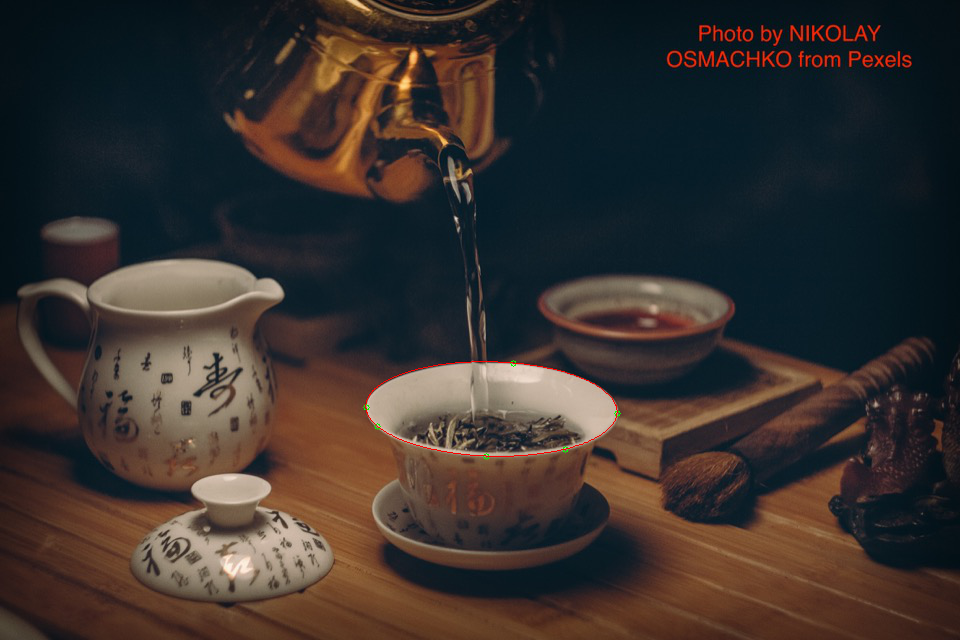

In [48]:
def getMatrixRow(p):
  (x,y) = p
  return np.array([x*x, 2*x*y, y*y, 2*x, 2*y, 1])

def getMatrixM(points):
  M = np.zeros((6,6))
  for i in range(len(points)):
    M[i] = getMatrixRow(points[i])
  return M



M = getMatrixM(points)

mu, ms, mv = np.linalg.svd(M)
R = mv[5, :] # last row of mv

# R[0]=A R[1]=H R[2]=B R[3]=G R[4]=F R[5]=C
R /= R[0]
#find circle->ellipse conversion
E = np.array([
    [R[0], R[1], R[3]],
    [R[1], R[2], R[4]],
    [R[3], R[4], R[5]],
], np.double)
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)
  
cv2_imshow(img)